In [1]:
%load_ext autoreload
%autoreload 2

# About

This notebooks performs benchmarks on the "standard solvers".

There are two standard solvers:

* `scipy.linalg.sylvester`: Bartels-Stewart algorithm, uses `TRSYL` from LAPACK to solve the simplified eqation
* `solve_sylvester_linear`: reformulate the equation as a linear system and solve with `numpy.linalg.solve`

Note that the provided framework for benchmarking (via the function `benchmark_utils.benchmark`) **checks by default the validity every solution produced** to ensure consistency.

## Reminder

The `solve_sylvester_linear` uses the property that the Sylvester equation

$$AX - XB = C$$

can be formulated as

$$\mathcal A \mathbf x = \mathbf c \; ,$$

with $\mathcal A := \mathbb I_n \otimes A - B^\top \otimes \mathbb I_m, \; \mathbf x := \text{vec}(X), \; \mathbf c := \text{vec}(C)$. Refer to the report for details.

# Benchmark standard solvers



## Howto

We'll use `benchmark_utils.benchmark`, which provides an easy interface to vary parameters. Under the hood, it uses the function `benchmark_utils.multiple_runs` to which it passes a `solve_fun`. This solves the equation several times with random matrices of given dimensions, optionally checks the validity of the solution, and returns the computation times of each run. This will allow us to have a **mean** and **standard deviation** of the computational time.

In [2]:
from benchmark_utils import benchmark
from utils import solve_sylvester_scipy

For instance, let's use the built-in scipy solver of the Sylvester equation. We vary the size of the matrices:

In [3]:
r = benchmark(
    solve_sylvester_scipy, 
    vary_param=('dim', [(10, 10), (20, 20), (100, 100)]), 
    log_context={'test': 'test'}
)
r

dim=(10, 10)
dim=(20, 20)
dim=(100, 100)


[{'dim': (10, 10),
  'time': [0.0003006458282470703,
   0.00011038780212402344,
   0.000102996826171875,
   0.00010251998901367188,
   0.00010085105895996094],
  'test': 'test'},
 {'dim': (20, 20),
  'time': [0.0003571510314941406,
   0.00026679039001464844,
   0.0002682209014892578,
   0.00026798248291015625,
   0.0002675056457519531],
  'test': 'test'},
 {'dim': (100, 100),
  'time': [0.011934995651245117,
   0.021178722381591797,
   0.01155543327331543,
   0.011162281036376953,
   0.010782241821289062],
  'test': 'test'}]

## Benchmark scipy solver

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
res_scipy = []

In [6]:
dimensions = [(n, n) for n in np.logspace(1, 3.30, dtype=int, num=10)]

In [7]:
res_scipy = benchmark(
    solve_sylvester_scipy,
    vary_param=('dim', dimensions),
    log_context={
        'solve_fun': 'syl_scipy'
    }
)

dim=(10, 10)
dim=(18, 18)
dim=(32, 32)
dim=(58, 58)
dim=(105, 105)
dim=(189, 189)
dim=(341, 341)
dim=(615, 615)
dim=(1107, 1107)
dim=(1995, 1995)


In [8]:
def format_results(res_dic):
    df = pd.DataFrame(res_dic)
    df['time_mean'] = df.time.apply(np.mean)
    df['time_std'] = df.time.apply(np.std)
    df['m'] = df.dim.apply(lambda e: e[0])
    df['n'] = df.dim.apply(lambda e: e[1])
    df['time_lst'] = df.time.copy()
    df.drop(columns='time', inplace=True)
    return df

In [9]:
df = format_results(res_scipy)
df

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_scipy,0.000773,0.000190,10,10,"[0.00104522705078125, 0.0009360313415527344, 0..."
1,"(18, 18)",syl_scipy,0.001180,0.000088,18,18,"[0.0013480186462402344, 0.001188039779663086, ..."
2,"(32, 32)",syl_scipy,0.002858,0.000438,32,32,"[0.0032765865325927734, 0.003199338912963867, ..."
3,"(58, 58)",syl_scipy,0.004251,0.001118,58,58,"[0.006224632263183594, 0.004620790481567383, 0..."
4,"(105, 105)",syl_scipy,0.049428,0.020797,105,105,"[0.02118825912475586, 0.027412891387939453, 0...."
5,"(189, 189)",syl_scipy,0.095708,0.014029,189,189,"[0.10483813285827637, 0.07554864883422852, 0.1..."
6,"(341, 341)",syl_scipy,0.236645,0.061672,341,341,"[0.2907876968383789, 0.19525933265686035, 0.20..."
7,"(615, 615)",syl_scipy,0.868140,0.085370,615,615,"[0.9989209175109863, 0.8435373306274414, 0.764..."
8,"(1107, 1107)",syl_scipy,3.911929,0.267313,1107,1107,"[4.4423956871032715, 3.815711259841919, 3.7859..."
9,"(1995, 1995)",syl_scipy,18.363419,0.581745,1995,1995,"[17.941341400146484, 18.33820867538452, 19.253..."


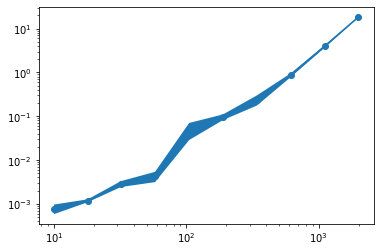

In [10]:
plt.loglog(df.n, df.time_mean, '-o')

plt.fill_between(df.n, df.time_mean - df.time_std, df.time_mean + df.time_std)

##
        run_config['solve_fun'] = DIC_SOLVE_FUN[solve_fun] Benchmark linear solver

In [11]:
from utils import solve_sylvester_linear

In [12]:
dimensions = [(n, n) for n in np.logspace(1, 2.1, dtype=int, num=10)]

In [13]:
res_linear = benchmark(
    solve_sylvester_linear,
    vary_param=('dim', dimensions),
    log_context={
        'solve_fun': 'syl_linear'
    }
)

dim=(10, 10)
dim=(13, 13)
dim=(17, 17)
dim=(23, 23)
dim=(30, 30)
dim=(40, 40)
dim=(54, 54)
dim=(71, 71)
dim=(95, 95)
dim=(125, 125)


In [14]:
df = format_results(res_linear)

In [15]:
df

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_linear,0.050038,0.060011,10,10,"[0.16832566261291504, 0.03872323036193848, 0.0..."
1,"(13, 13)",syl_linear,0.009057,0.009384,13,13,"[0.0026624202728271484, 0.0038187503814697266,..."
2,"(17, 17)",syl_linear,0.001740,0.001366,17,17,"[0.004469156265258789, 0.0011417865753173828, ..."
3,"(23, 23)",syl_linear,0.003856,0.001147,23,23,"[0.004583597183227539, 0.005778789520263672, 0..."
4,"(30, 30)",syl_linear,0.039590,0.053041,30,30,"[0.011738300323486328, 0.009380340576171875, 0..."
5,"(40, 40)",syl_linear,0.099472,0.062000,40,40,"[0.18768644332885742, 0.06483626365661621, 0.0..."
6,"(54, 54)",syl_linear,0.257819,0.128004,54,54,"[0.5138051509857178, 0.19647789001464844, 0.19..."
7,"(71, 71)",syl_linear,0.832550,0.095911,71,71,"[0.7440471649169922, 0.8297429084777832, 0.986..."
8,"(95, 95)",syl_linear,3.270986,0.045892,95,95,"[3.1813719272613525, 3.3000497817993164, 3.280..."
9,"(125, 125)",syl_linear,16.361849,1.915346,125,125,"[14.648710250854492, 16.307185649871826, 19.62..."


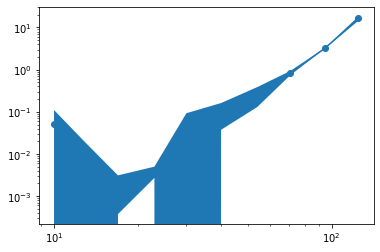

In [16]:
plt.loglog(df.n, df.time_mean, '-o')
plt.fill_between(df.n, df.time_mean - df.time_std, df.time_mean + df.time_std)

## Save results

In [17]:
import json

In [18]:
res_dump = res_linear + res_scipy

# Map np.int64 to int
for v in res_dump:
    v['dim'] = (int(v['dim'][0]), int(v['dim'][1]))

In [19]:
with open('res/benchmark_std.json', 'w') as f:
    json.dump(res_dump, f)

# Benchmark Bartel Stewart

We want to measure the time required to compute the schur decomposition and the back mapping. We will use the scipy's solver. The function `utils.solve_bertel_stewart` handles the coordinate change and provides separate times for the shur decomp, solving triangular system and back mapping. 

In [20]:
dimensions = [(n, n) for n in np.logspace(1, 3.3, dtype=int, num=10)]

In [21]:
res_bs_scipy = benchmark(
    solve_sylvester_scipy,
    vary_param=('dim', dimensions),
    bertel_stewart=True,
    log_context={
        'solve_fun': 'syl_scipy',
        'bertel_stewart': True
    }
)

dim=(10, 10)
dim=(18, 18)
dim=(32, 32)
dim=(58, 58)
dim=(105, 105)
dim=(189, 189)
dim=(341, 341)
dim=(615, 615)
dim=(1107, 1107)
dim=(1995, 1995)


In [22]:
def format_results_bs(res_dic):
    df = pd.DataFrame(res_dic)
    df.time = df.time.apply(np.array)
    df['time_schur'] = df.time.apply(lambda lst: [tpl[0] for tpl in lst])
    df['time_solve'] = df.time.apply(lambda lst: [tpl[1] for tpl in lst])
    df['time_back'] = df.time.apply(lambda lst: [tpl[2] for tpl in lst])
    df.drop(columns='time', inplace=True)

    for e in df.columns:
        if e.startswith('time_'):
            df[f'{e}_mean'] = df[e].apply(np.mean)
            df[f'{e}_std'] = df[e].apply(np.std)
    
    df['m'] = df.dim.apply(lambda e: e[0])
    df['n'] = df.dim.apply(lambda e: e[1])
    
    return df

In [23]:
df = format_results_bs(res_bs_scipy)
df.head(2)

,dim,solve_fun,time_schur,time_solve,time_back,time_schur_mean,time_schur_std,time_solve_mean,time_solve_std,time_back_mean,time_back_std,m,n
0,"(10, 10)",syl_scipy,"[0.0007178783416748047, 0.0004799365997314453,...","[0.0007047653198242188, 0.00042629241943359375...","[6.437301635742188e-05, 5.602836608886719e-05,...",0.000526,0.000097,0.000494,0.000106,0.000055,0.000005,10,10
1,"(18, 18)",syl_scipy,"[0.0010671615600585938, 0.0009598731994628906,...","[0.0008113384246826172, 0.0008616447448730469,...","[6.842613220214844e-05, 6.794929504394531e-05,...",0.000969,0.000059,0.000816,0.000031,0.000066,0.000002,18,18


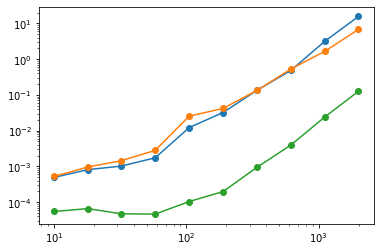

In [24]:
plt.loglog(df.n, df.time_solve_mean, '-o')
plt.loglog(df.n, df.time_schur_mean, '-o')
plt.loglog(df.n, df.time_back_mean, '-o')

## Solve 

In [25]:
# Map np.int64 to int
for v in res_bs_scipy:
    v['dim'] = (int(v['dim'][0]), int(v['dim'][1]))
    
with open('res/benchmark_bartel_stewart_scipy.json', 'w') as f:
    json.dump(res_bs_scipy, f)

# Plotting for the report

In [26]:
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib()
import seaborn as sns
sns.set(style='whitegrid')

/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecati

In [27]:
df_std_scipy = format_results(res_scipy)
df_std_scipy.head(2)

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_scipy,0.000773,0.000190,10,10,"[0.00104522705078125, 0.0009360313415527344, 0..."
1,"(18, 18)",syl_scipy,0.001180,0.000088,18,18,"[0.0013480186462402344, 0.001188039779663086, ..."


In [28]:
df_std_lin = format_results(res_linear)
df_std_lin.head(2)

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_linear,0.050038,0.060011,10,10,"[0.16832566261291504, 0.03872323036193848, 0.0..."
1,"(13, 13)",syl_linear,0.009057,0.009384,13,13,"[0.0026624202728271484, 0.0038187503814697266,..."


In [29]:
df_bs_scipy = format_results_bs(res_bs_scipy)
df_bs_scipy.head(2)

,dim,solve_fun,time_schur,time_solve,time_back,time_schur_mean,time_schur_std,time_solve_mean,time_solve_std,time_back_mean,time_back_std,m,n
0,"(10, 10)",syl_scipy,"[0.0007178783416748047, 0.0004799365997314453,...","[0.0007047653198242188, 0.00042629241943359375...","[6.437301635742188e-05, 5.602836608886719e-05,...",0.000526,0.000097,0.000494,0.000106,0.000055,0.000005,10,10
1,"(18, 18)",syl_scipy,"[0.0010671615600585938, 0.0009598731994628906,...","[0.0008113384246826172, 0.0008616447448730469,...","[6.842613220214844e-05, 6.794929504394531e-05,...",0.000969,0.000059,0.000816,0.000031,0.000066,0.000002,18,18


In [47]:
def plot_multiple_runs(df, x, y, ystd, label, color=None):
    plt.loglog(df[x], df[y], '-o', label=label, color=color)
    plt.fill_between(df[x], df[y] - df[ystd], df[y] + df[ystd], alpha=.4, color=color)

In [49]:
cols = sns.color_palette()

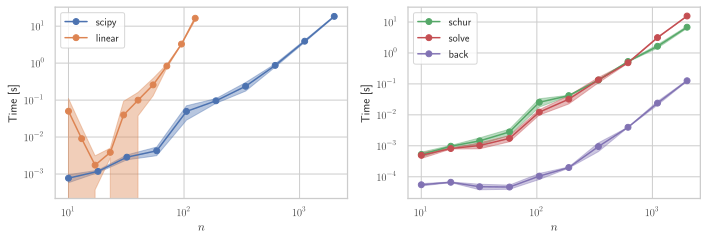

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3.5), sharex=True)

plt.axes(ax[0])
plot_multiple_runs(df_std_scipy, 'n', 'time_mean', 'time_std', 'scipy', color=cols[0])
plot_multiple_runs(df_std_lin, 'n', 'time_mean', 'time_std', 'linear', color=cols[1])

plt.legend()
plt.axes(ax[1])

plot_multiple_runs(df_bs_scipy, 'n', 'time_schur_mean', 'time_schur_std', label='schur', color=cols[2])
plot_multiple_runs(df_bs_scipy, 'n', 'time_solve_mean', 'time_solve_std', label='solve', color=cols[3])
plot_multiple_runs(df_bs_scipy, 'n', 'time_back_mean', 'time_back_std', label='back', color=cols[4])

plt.legend()
ax[0].set_xlabel('$n$'); ax[1].set_xlabel('$n$')
ax[0].set_ylabel('Time [s]'); ax[1].set_ylabel('Time [s]');
plt.tight_layout()
plt.savefig('res/benchmark_intro.pdf', bbox_inches='tight')

In [51]:
np.logspace(1, 3.3, dtype=int, num=10)

array([  10,   18,   32,   58,  105,  189,  341,  615, 1107, 1995])

In [53]:
df_std_lin

,dim,solve_fun,time_mean,time_std,m,n,time_lst
0,"(10, 10)",syl_linear,0.050038,0.060011,10,10,"[0.16832566261291504, 0.03872323036193848, 0.0..."
1,"(13, 13)",syl_linear,0.009057,0.009384,13,13,"[0.0026624202728271484, 0.0038187503814697266,..."
2,"(17, 17)",syl_linear,0.001740,0.001366,17,17,"[0.004469156265258789, 0.0011417865753173828, ..."
3,"(23, 23)",syl_linear,0.003856,0.001147,23,23,"[0.004583597183227539, 0.005778789520263672, 0..."
4,"(30, 30)",syl_linear,0.039590,0.053041,30,30,"[0.011738300323486328, 0.009380340576171875, 0..."
5,"(40, 40)",syl_linear,0.099472,0.062000,40,40,"[0.18768644332885742, 0.06483626365661621, 0.0..."
6,"(54, 54)",syl_linear,0.257819,0.128004,54,54,"[0.5138051509857178, 0.19647789001464844, 0.19..."
7,"(71, 71)",syl_linear,0.832550,0.095911,71,71,"[0.7440471649169922, 0.8297429084777832, 0.986..."
8,"(95, 95)",syl_linear,3.270986,0.045892,95,95,"[3.1813719272613525, 3.3000497817993164, 3.280..."
9,"(125, 125)",syl_linear,16.361849,1.915346,125,125,"[14.648710250854492, 16.307185649871826, 19.62..."
